In [2]:
import pandas as pd
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [4]:
#read in data from csv

#If code does not work make sure the file path is correct for you
spy_df = pd.read_csv("/Users/blakealmon/Documents/Code/Github/spyDataEDA/spy2.csv")
pd.set_option('display.max_columns', None)
spy_df.head

<bound method NDFrame.head of             Date        Open        High         Low       Close     Volume  \
0     1993-01-29   25.140215   25.140215   25.015139   25.122347    1003200   
1     1993-02-01   25.140216   25.301027   25.140216   25.301027     480500   
2     1993-02-02   25.283171   25.372511   25.229567   25.354643     201300   
3     1993-02-03   25.390365   25.640516   25.372497   25.622648     529400   
4     1993-02-04   25.711979   25.783451   25.426092   25.729847     531500   
...          ...         ...         ...         ...         ...        ...   
7634  2023-05-24  412.420013  412.820007  409.880005  411.089996   89213700   
7635  2023-05-25  414.739990  416.160004  412.410004  414.649994   90961600   
7636  2023-05-26  415.329987  420.769989  415.250000  420.019989   93830000   
7637  2023-05-30  422.029999  422.579987  418.739990  420.179993   72216000   
7638  2023-05-31  418.279999  419.220001  416.220001  417.850006  110811800   

      Day  Weekday  W

In [8]:
spy_df['UpDown'] = spy_df['Close'] - spy_df['Open']

spy_df.tail()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,UpDown
7634,2023-05-24,412.420013,412.820007,409.880005,411.089996,89213700,24,2,21,5,2023,-1.330017
7635,2023-05-25,414.739990,416.160004,412.410004,414.649994,90961600,25,3,21,5,2023,-0.089996
7636,2023-05-26,415.329987,420.769989,415.250000,420.019989,93830000,26,4,21,5,2023,4.690002
7637,2023-05-30,422.029999,422.579987,418.739990,420.179993,72216000,30,1,22,5,2023,-1.850006
7638,2023-05-31,418.279999,419.220001,416.220001,417.850006,110811800,31,2,22,5,2023,-0.429993


In [10]:

# iterate over columns
for i in range(spy_df.shape[1]):
  
    # iterate over rows
    for j in range(spy_df.shape[0]):
  
        # accessing the cell value
        cell = spy_df.at[j, 'UpDown']
  
        # check if cell value is negative
        if(cell < 0):
            # replace the cell value
                spy_df.at[j, 'UpDown'] = 0
        elif(cell > 0):
            spy_df.at[j, 'UpDown'] = 1

       
  
print("Modified DataFrame : ")
spy_df.tail(10)

Modified DataFrame : 


,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,UpDown
7629,2023-05-17,412.350006,415.859985,410.640015,415.230011,87287000,17,2,20,5,2023,1.0
7630,2023-05-18,414.899994,419.670013,414.670013,419.230011,97177200,18,3,20,5,2023,1.0
7631,2023-05-19,420.170013,420.720001,417.350006,418.619995,103679700,19,4,20,5,2023,0.0
7632,2023-05-22,418.640015,420.390015,417.350006,418.790009,60745400,22,0,21,5,2023,1.0
7633,2023-05-23,417.079987,418.720001,413.679993,414.089996,86383500,23,1,21,5,2023,0.0
7634,2023-05-24,412.420013,412.820007,409.880005,411.089996,89213700,24,2,21,5,2023,0.0
7635,2023-05-25,414.739990,416.160004,412.410004,414.649994,90961600,25,3,21,5,2023,0.0
7636,2023-05-26,415.329987,420.769989,415.250000,420.019989,93830000,26,4,21,5,2023,1.0
7637,2023-05-30,422.029999,422.579987,418.739990,420.179993,72216000,30,1,22,5,2023,0.0
7638,2023-05-31,418.279999,419.220001,416.220001,417.850006,110811800,31,2,22,5,2023,0.0


In [4]:
corrSPYdf = spy_df
cols_2_drop = ["Date"]
corrSPYdf.drop(cols_2_drop, axis = 1, inplace = True)
corrSPYdf.head()

,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,25.140215,25.140215,25.015139,25.122347,1003200,29,4,4,1,1993
1,25.140216,25.301027,25.140216,25.301027,480500,1,0,5,2,1993
2,25.283171,25.372511,25.229567,25.354643,201300,2,1,5,2,1993
3,25.390365,25.640516,25.372497,25.622648,529400,3,2,5,2,1993
4,25.711979,25.783451,25.426092,25.729847,531500,4,3,5,2,1993


<Axes: >

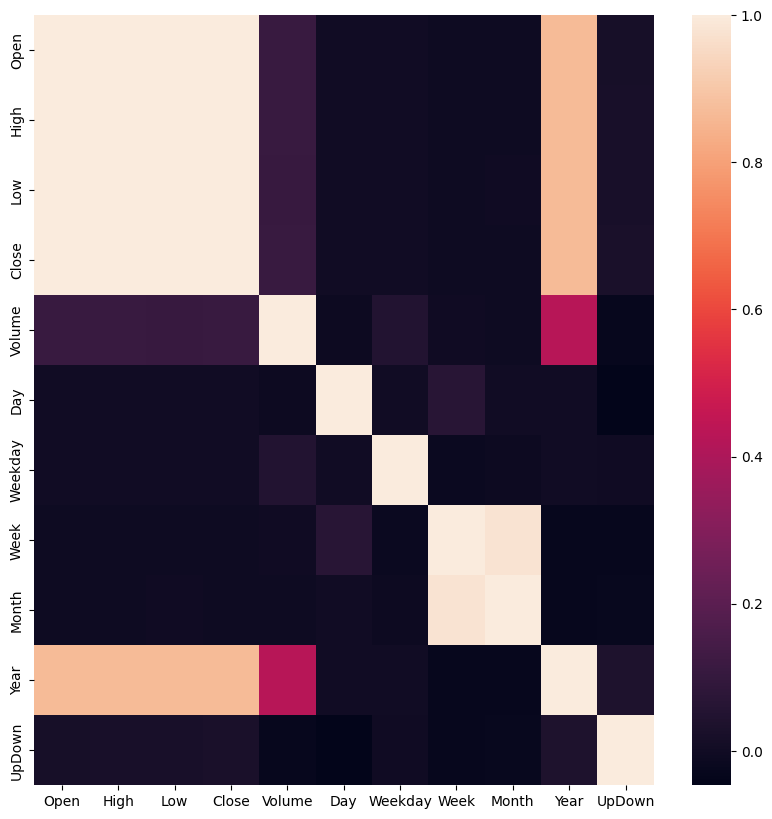

In [21]:
corr_mat = corrSPYdf.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat)

In [11]:
px.scatter(spy_df, x =  'Date', y = 'Volume', color="UpDown")